# 이미지 로데이터 파일에서 데이터추출

In [5]:
# 1. 파일 입출력 방식
# with open() as ~ 

file_path = '../data/MNIST/t10k-images-idx3-ubyte.gz'

In [6]:
# 파일 읽을 때 고려사항 => mode = br(byte read)
with open(file_path, mode='br') as f:
    all_data = f.read()

In [9]:
type(all_data), len(all_data)

(bytes, 1648877)

In [11]:
all_data[:10] # 앞에 붙어 있는 b는 byte라는 뜻

b'\x1f\x8b\x08\x08\xad\xa6\xcc4\x00\x03'

In [15]:
with open(file_path, mode='br') as f:
    
    magec_code = f.read(4)
    print(magec_code)
    
    data_length = f.read(4)
    print(data_length)
    
    row = f.read(4)
    print(row)
    
    col = f.read(4)
    print(col)

b'\x1f\x8b\x08\x08'
b'\xad\xa6\xcc4'
b'\x00\x03t1'
b'0k-i'


In [17]:
# 바이트 ==> 알아보는 문자로 
print(row, row.hex()) # => 2진수 to 10진수

b'\x00\x03t1' 00037431


In [ ]:
# struct는 00037431이거를 00/03/74/31 format에 맞게 바꿔줌 

# 2. 파이썬의 바이트 데이터 변환 모듈 활용 => [struct](https://docs.python.org/ko/3/library/struct.html) 활용

In [77]:
# 모듈로딩
import struct

import pandas as pd
import numpy as np

In [78]:
# 데이터 추출 및 저장 관련 변수
# 학습용 : train.csv
# 테스트용 : test.csv
# 위치 : ../data/

save_dir = '../data/'
data_dir = '../data/MNIST/'
train_file = data_dir + 'train.csv'
test_file = data_dir + 'test.csv'

save_file = '../data/MNIST/mnist.csv'

In [83]:
### 사용자 정의 함수 
'''
기능 : raw data 파일을 읽어서 csv파일로 저장
함수명 : to_csv
매개 변수 : 파일이름, 데이터수
반환값 : 파일 생성 여부 T/F
'''
import os, struct

DEBUG = True

# name에는 train인지 test(t10k)인지만 들어가도록
def to_csv(name, maxdata): 
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open(data_dir+name+"-labels.idx1-ubyte", "rb")
    img_f = open(data_dir+name+"-images.idx3-ubyte", "rb")
                 
    # csv 파일 생성
    csv_f = open(data_dir+name+".csv", "w", encoding="utf-8")
    
    # 헤더정보읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) # 매직코드+ 레이블갯수
    mag, img_count = struct.unpack(">II", img_f.read(8)) # 매직코드+ 이미지갯수
    rows, cols = struct.unpack(">II", img_f.read(8)) # 행, 열갯수
    pixels = rows * cols
    
    if DEBUG:
        print('lbl_count {}, img_count {}'.format(lbl_count, img_count))
        print('rows {}, cols {}'.format(rows, cols))
        
    # [2] 이미지 데이터를 읽고 csv로 저장
    # 라벨, 데이터, 데이터, 데이터, 데이터 ...
    for idx in range(lbl_count):
        if idx > maxdata: break
        
        # 숫자이미지 데이터가 의미하는 숫자값 읽기
        # 튜플타임 리턴 -> 1개 데이터 (value,)
        label = struct.unpack("B", lbl_f.read(1))[0]
        # B => unsigned char, 정수, 표준크기 =1
        # if DEBUG: print('label => {}'.format(label))
        
        ##################################
        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata)) # 문자열로 변환
        # print('sdata => {}'.format(sdata))
        
        # CSV 파일에 쓰기
        csv_f.write(str(label)+",") # 숫자 라벨 쓰기
        csv_f.write(",".join(sdata)+"\n") # 리스트 이미지 데이터 -> 문자열 변환 쓰기 두줄 띄어서 저장
        ##################################
        
    csv_f.close()
    lbl_f.close()
    img_f.close()
    # 생성된 파일 존재 여부 확인 후 반환 
    return os.path.exists(data_dir + f'{name}.csv') # return T/F

In [84]:
# 학습용 데이터 파일 생성 
to_csv("train", 10000)

lbl_count 60000, img_count 60000
rows 28, cols 28


True

In [85]:
# 테스트용 데이터 파일 생성
to_csv("t10k", 1000)

lbl_count 10000, img_count 10000
rows 28, cols 28


True

# 3 이미지 데이터 로딩 후 시각화

## 3-1 이미지 데이터 로딩 csv => DataFrame 또는 Numpy

In [86]:
trainDF = pd.read_csv(train_file, header=None)
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [87]:
trainDF = pd.read_csv(train_file, header=None)
trainDF.info() # Columns: 785 entries, 0 to 784

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [88]:
trainDF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
## 3-2 데이터 시각화
labels = trainDF[0]
img_data = trainDF.iloc[:, 1:]

labels.shape, img_data.shape, img_data[:3]

((10001,),
 (10001, 784),
    1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
 0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    0  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    0  
 
 [3 rows x 784 columns])

In [90]:
# 이미지 데이터 => 2차원 이미지 데이터 변환 
raw_img = img_data.iloc[0].values

type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (784,), 1)

In [91]:
raw_img = raw_img.reshape(28, -1)

type(raw_img), raw_img.shape, raw_img.ndim # 2D로 바뀜 

(numpy.ndarray, (28, 28), 2)

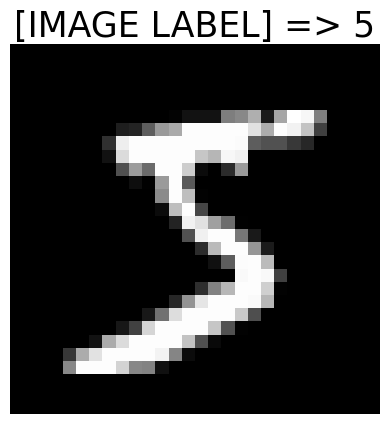

In [92]:
import matplotlib.pyplot as plt
# 시각화 
plt.title(f"[IMAGE LABEL] => {labels[0]}", fontsize=25)
plt.imshow(raw_img, cmap="gray")
plt.axis("off")
plt.show()